In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from hmmlearn import hmm
from sklearn.cross_validation import KFold
from msmbuilder.hmm import VonMisesHMM
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

In [2]:
"""
Load an example of letter A
and an example of letter L
"""
A1=pd.read_csv('Unistroke/A01.txt','\t',header=None,)[1:]
L1=pd.read_csv('Unistroke/L01.txt','\t',header=None,)[1:]

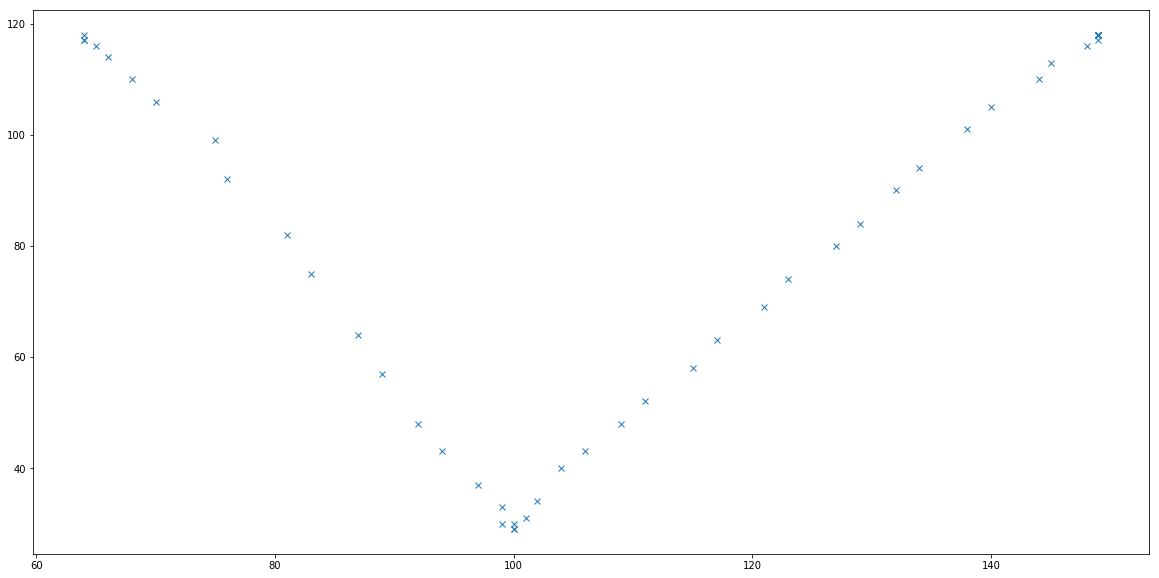

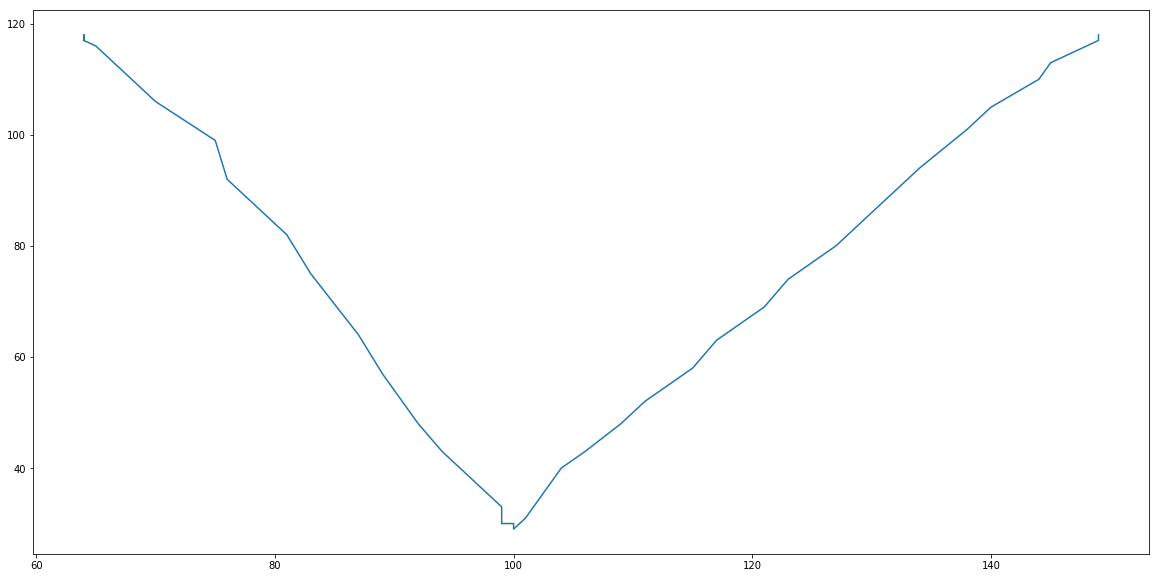

In [3]:
"""
Plotting of letter A
"""
plt.figure(figsize=(20,10))
plt.plot(A1[0],A1[1],'x')
plt.show()
plt.figure(figsize=(20,10))
plt.plot(A1[0],A1[1])
plt.show()

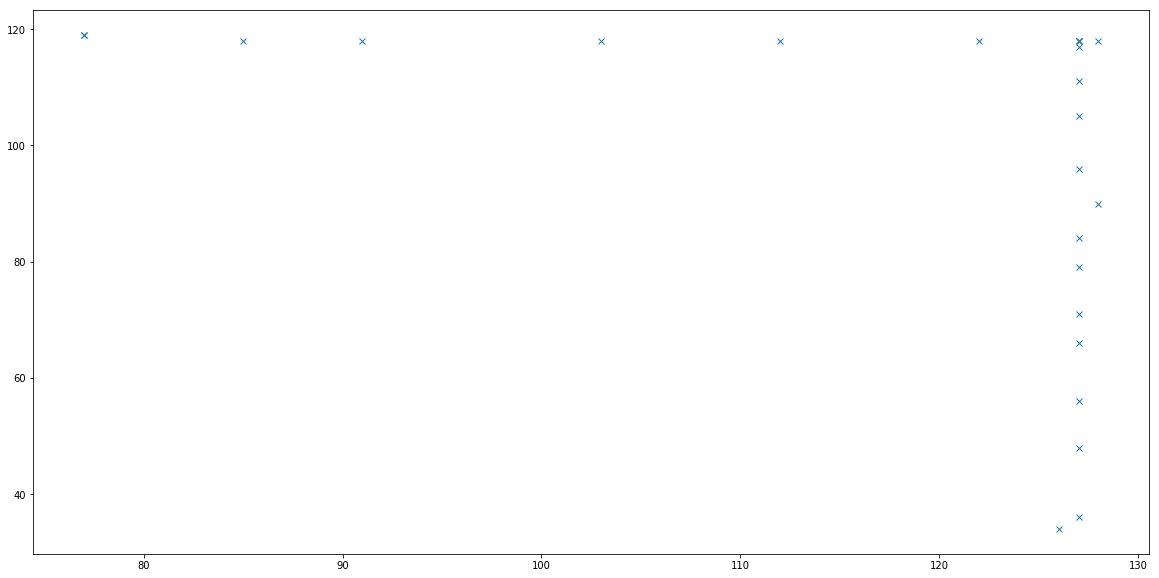

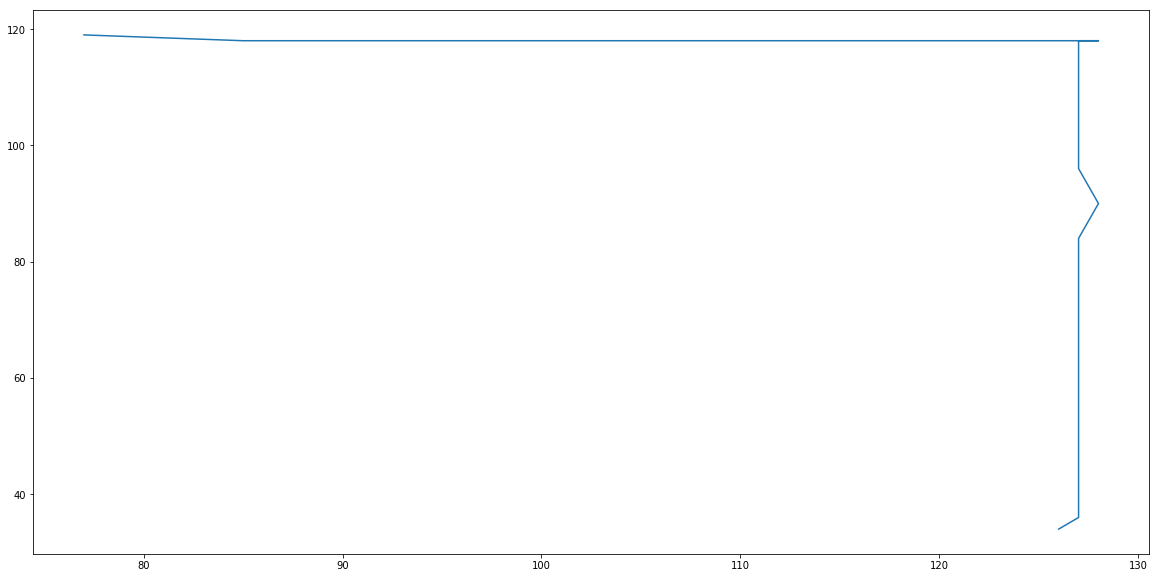

In [4]:
"""
Plotting of letter L
"""
plt.figure(figsize=(20,10))
plt.plot(L1[0],L1[1],'x')
plt.show()
plt.figure(figsize=(20,10))
plt.plot(L1[0],L1[1])
plt.show()

In [309]:

# Our model always start with state 1
startprob = np.array([1,0])

#Continue in state 1 for long length of the sequence
#then transmit to state 2 without possibility to return to state 1
transmat = np.array([[0.95,0.05],
                     [0,1]])

#In these data, the letter a is written from right to left
#For the state 1 we have a vector with angle -3*Pi/4 we can write these vectors as (-1,-1)
#and for the state 2 we have vector with angle 3*Pi/4 we can write these vectors as (-1,1)
means = np.array([[-1,-1],
                 [-1,1]])

#We chose small covariances because letter a is almost similar to two line with angle pi/4 between them,
#and we don't have a big variance between the direction of the vectors
cov1=np.array([[0.1,0],
               [0,0.1]])
cov2=np.array([[0.1,0],
               [0,0.1]])
covars =  np.array([cov1,cov2])

#Build an HMM instance with 2 states
model = hmm.GaussianHMM(n_components=2, covariance_type="full")

#Set the parameters

model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

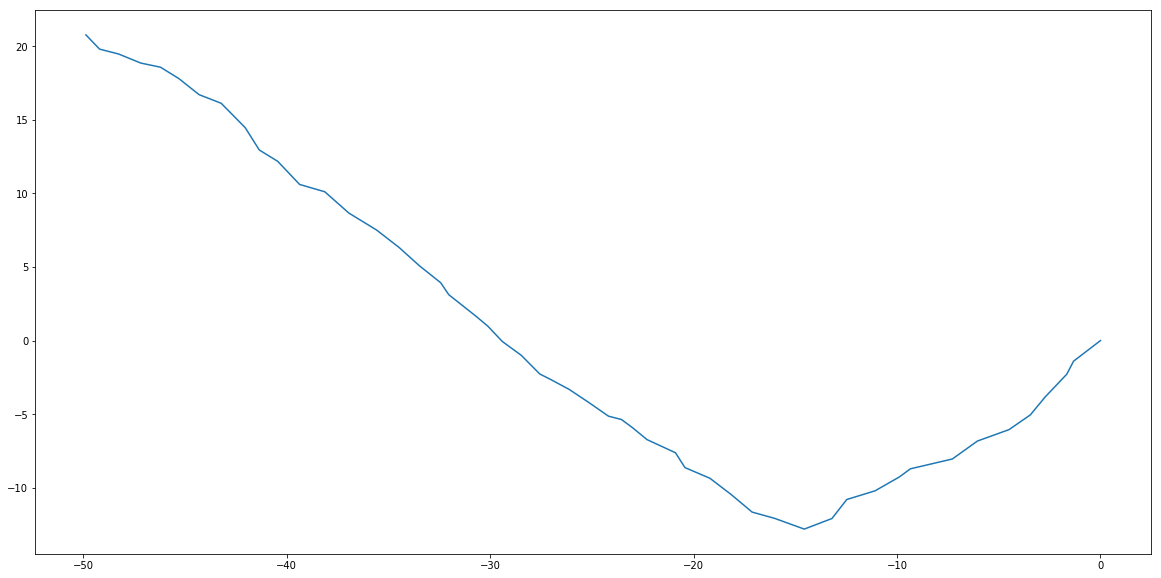

In [311]:
#similation of sequence of length 50
sim,s=model.sample(50)

#Reconstruct x by computing the sum of all previous vectors
#the model give us the vectors y
#so x(t)=y(t)+x(t-1)
x=np.array([0,0])
n=np.array([[0,0]])
for i in sim:
    x=i+x
    n=np.vstack([n,x])
#plotting of the result
plt.figure(figsize=(20,10))
plt.plot(n[:,0],n[:,1])

In [312]:
#Prepare the data
def normalized(x,y):
    newX=x-y
    norm=np.linalg.norm(newX,axis=1)
    normalizedX=newX/norm[:,None]
    return pd.DataFrame(normalizedX)
trainDataA=np.array([])
lengthsA=[]
data=pd.read_csv('Unistroke/A01.txt','\t')[1:]
data=(normalized(data.values,data.shift(1).values)).dropna()
trainDataA=data.values
lengthsA.append(len(data.values))
for i in range(2,51):
    if i<10:
        x='0'+str(i)
    else:
        x=str(i)
    data=pd.read_csv('Unistroke/A'+x+'.txt','\t')[1:]
    data=(normalized(data.values,data.shift(1).values)).dropna()
    trainDataA=np.concatenate([trainDataA,data.values])
    lengthsA.append(len(data.values))

In [313]:
#Train the model
modelA=hmm.GaussianHMM(2,algorithm='viterbi',n_iter=100,tol=0.0001,covariance_type='full')
modelA.fit(trainDataA,lengths=lengthsA)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.0001,
      transmat_prior=1.0, verbose=False)

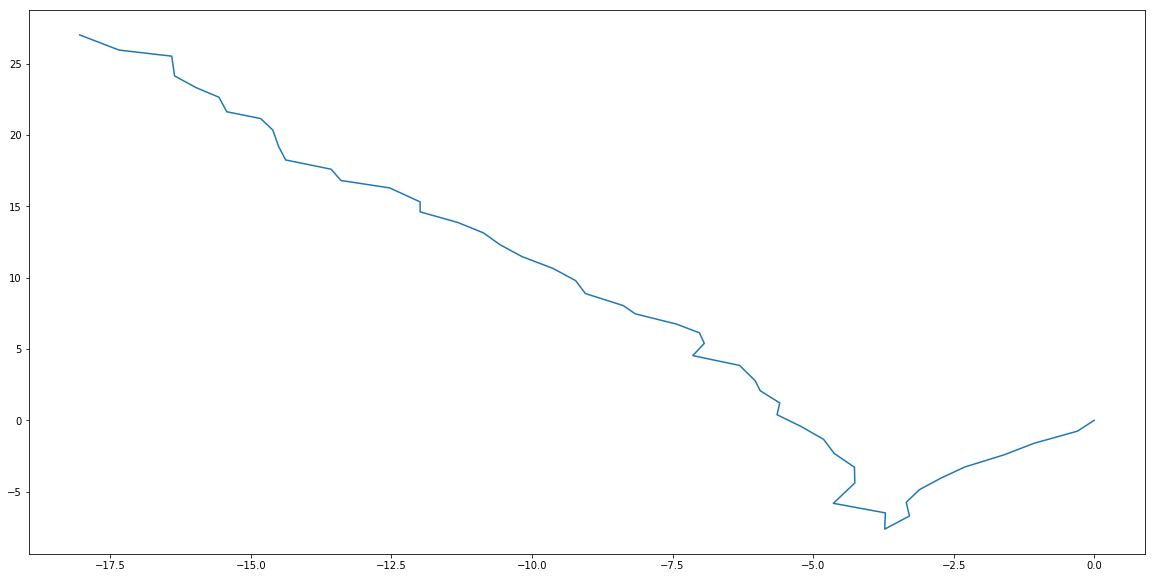

In [321]:
#Generate 50 samles
#reconstruct the points
sim,s=modelA.sample(50)
x=np.array([0,0])
n=np.array([[0,0]])
for i in sim:
    x=i+x
    n=np.vstack([n,x])
#plotting
plt.figure(figsize=(20,10))
plt.plot(n[:,0],n[:,1])

In [322]:
#Estimated covariance matrices
modelA.covars_

array([[[ 0.03664451, -0.00574024],
        [-0.00574024,  0.00426863]],

       [[ 0.07958593,  0.0174025 ],
        [ 0.0174025 ,  0.04012759]]])

In [323]:
#Estimated means
modelA.means_

array([[-0.45461509, -0.86744968],
       [-0.36540917,  0.86418005]])

In [324]:
#Estimated start probabilities
modelA.startprob_

array([1.00000000e+00, 3.22730256e-76])

In [325]:
#Estimated transmit matrices
modelA.transmat_

array([[0.84393071, 0.15606929],
       [0.02227721, 0.97772279]])

In [357]:
#Prepare the data for letter L
def normalized(x,y):
    newX=x-y
    norm=np.linalg.norm(newX,axis=1)
    normalizedX=newX/norm[:,None]
    return pd.DataFrame(normalizedX)
trainDataL=np.array([])
lengthsL=[]
data=pd.read_csv('Unistroke/L01.txt','\t')[1:]
data=(normalized(data.values,data.shift(1).values)).dropna()
trainDataL=data.values
lengthsL.append(len(data.values))
for i in range(2,51):
    if i<10:
        x='0'+str(i)
    else:
        x=str(i)
    data=pd.read_csv('Unistroke/L'+x+'.txt','\t')[1:]
    data=(normalized(data.values,data.shift(1).values)).dropna()
    trainDataL=np.concatenate([trainDataL,data.values])
    lengthsL.append(len(data.values))

In [358]:
#Train the model of letter L
modelL=hmm.GaussianHMM(2,algorithm='viterbi',n_iter=1000,tol=0.01,covariance_type='full')
modelL.fit(trainDataL,lengths=lengthsL)

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

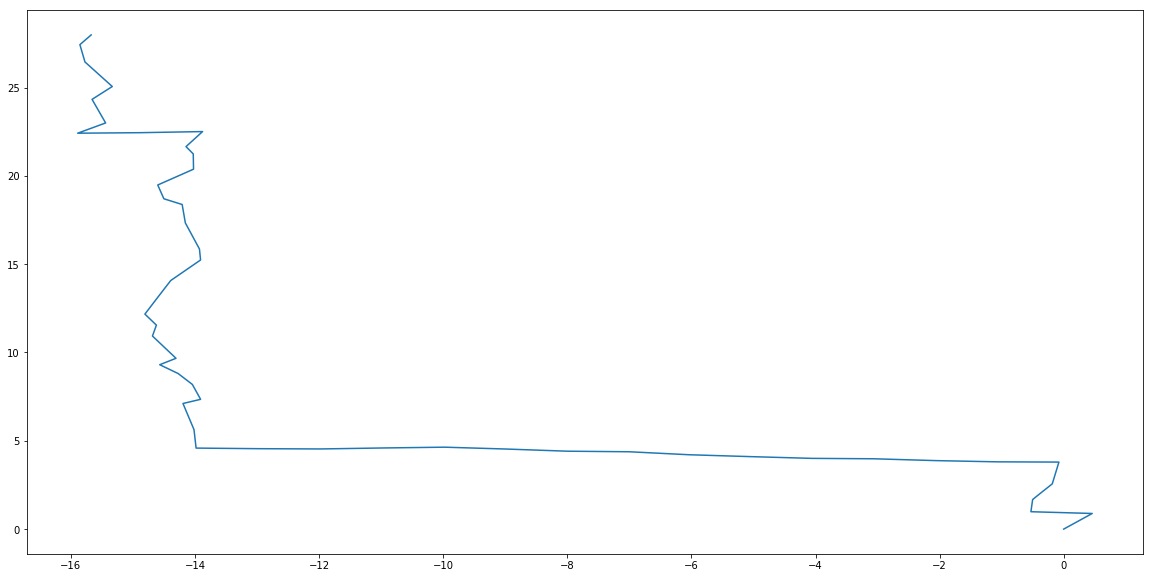

In [359]:
#Generate 50 samles
#reconstruct the points
sim,s=modelL.sample(50)
x=np.array([0,0])
n=np.array([[0,0]])
for i in sim:
    x=i+x
    n=np.vstack([n,x])
#plotting
plt.figure(figsize=(20,10))
plt.plot(n[:,0],n[:,1])

In [360]:
#Estimated covariance matrices
modelL.covars_

array([[[ 6.55291054e-05,  3.67242720e-04],
        [ 3.67242720e-04,  4.20889768e-03]],

       [[ 8.94997853e-02, -1.21003286e-02],
        [-1.21003286e-02,  1.30190482e-01]]])

In [361]:
#Estimated means
modelL.means_

array([[-0.99748313,  0.028432  ],
       [ 0.00605523,  0.8833556 ]])

In [362]:
#Estimated start probabilities
modelL.startprob_

array([0., 1.])

In [363]:
#Estimated transmit matrices
modelL.transmat_

array([[0.91179159, 0.08820841],
       [0.14186314, 0.85813686]])

In [364]:

# Our model always start with state 1
startprob = np.array([1,0])

#Continue in state 1 for long length of the sequence
#then transmit to state 2 without possibility to return to state 1
transmat = np.array([[0.95,0.05],
                     [0,1]])

#In these data, the letter a is written from right to left
#For the state 1 we have a vector with angle Pi/2 we can write these vectors as (0,1)
#and for the state 2 we have vector with angle Pi we can write these vectors as (-1,0)
means = np.array([[0,1],
                 [-1,0]])

#We chose small covariances because letter a is almost similar to two line with angle pi/4 between them,
#and we don't have a big variance between the direction of the vectors
cov1=np.array([[0.1,0],
               [0,0.1]])
cov2=np.array([[0.1,0],
               [0,0.1]])
covars =  np.array([cov1,cov2])

#Build an HMM instance with 2 states
model = hmm.GaussianHMM(n_components=2, covariance_type="full")

#Set the parameters

model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

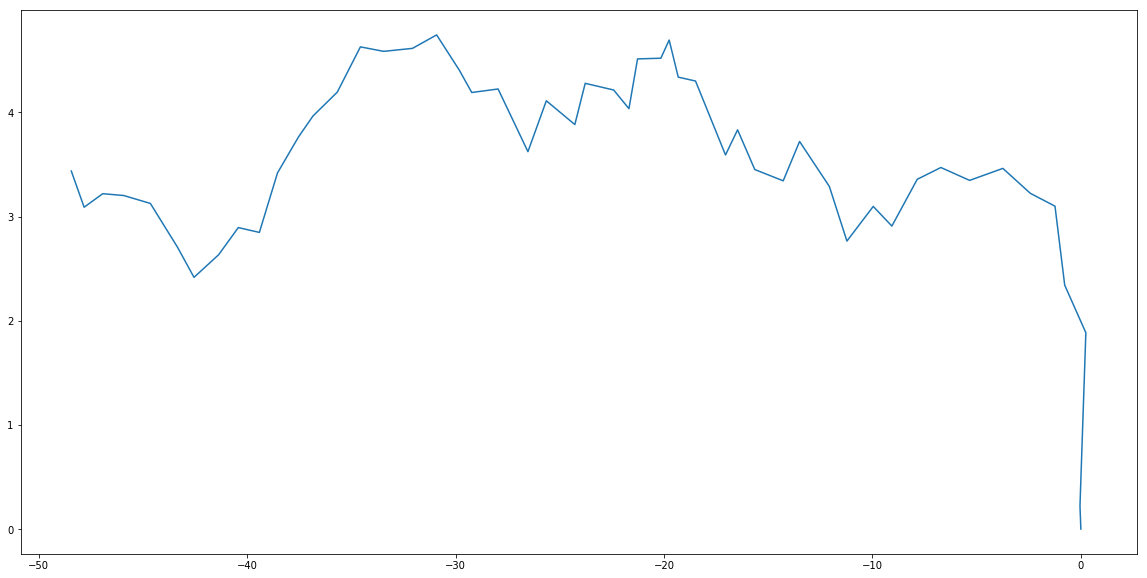

In [365]:
#similation of sequence of length 50
sim,s=model.sample(50)

#Reconstruct x by computing the sum of all previous vectors
#the model give us the vectors y
#so x(t)=y(t)+x(t-1)
x=np.array([0,0])
n=np.array([[0,0]])
for i in sim:
    x=i+x
    n=np.vstack([n,x])
#plotting of the result
plt.figure(figsize=(20,10))
plt.plot(n[:,0],n[:,1])

In [366]:
#prepare the data
d=(A1-A1.shift(1)).dropna()
#predict the hidden state
z=modelA.predict(d.values,[d.shape[0]])
z

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

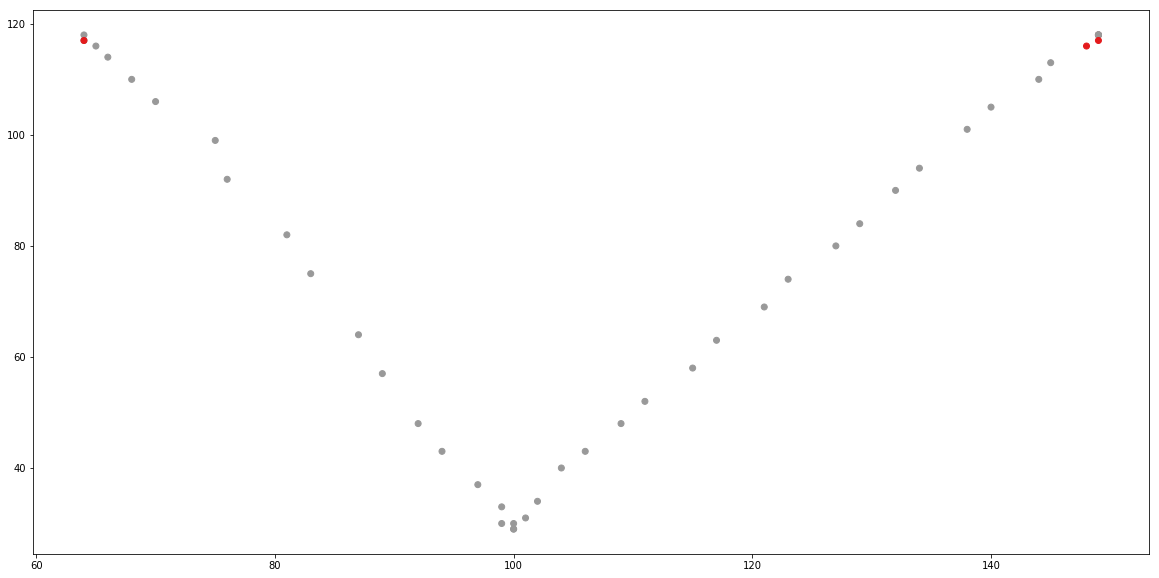

In [367]:
#plot the points with the labels
plt.figure(figsize=(20,10))
plt.scatter(A1.values[1:,0],A1.values[1:,1],c=z,cmap='Set1')

In [368]:
#prepare the data
d=(L1-L1.shift(1)).dropna()
#predict the hidden state
z=modelL.predict(d.values,[d.shape[0]])

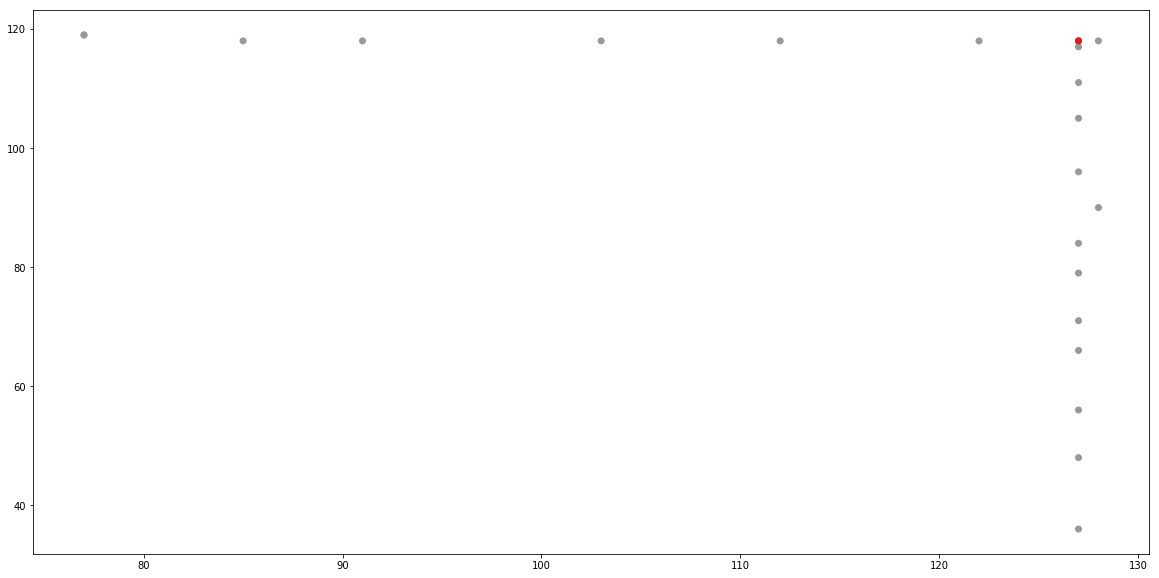

In [369]:
#plot the points with the labels
plt.figure(figsize=(20,10))
plt.scatter(L1.values[1:,0],L1.values[1:,1],c=z,cmap='Set1')

In [370]:
#Prepare the data
def normalized(x,y):
    newX=x-y
    norm=np.linalg.norm(newX,axis=1)
    normalizedX=newX/norm[:,None]
    return pd.DataFrame(normalizedX)
trainDataA=np.array([])
lengthsA=[]
data=pd.read_csv('Unistroke/A01.txt','\t')[1:]
data=(normalized(data.values,data.shift(1).values)).dropna()
trainDataA=data.values
lengthsA.append(len(data.values))
for i in range(2,51):
    if i<10:
        x='0'+str(i)
    else:
        x=str(i)
    data=pd.read_csv('Unistroke/A'+x+'.txt','\t')[1:]
    data=(normalized(data.values,data.shift(1).values)).dropna()
    trainDataA=np.concatenate([trainDataA,data.values])
    lengthsA.append(len(data.values))
#predict the labels for all points
z=modelA.predict(trainDataA,lengthsA)


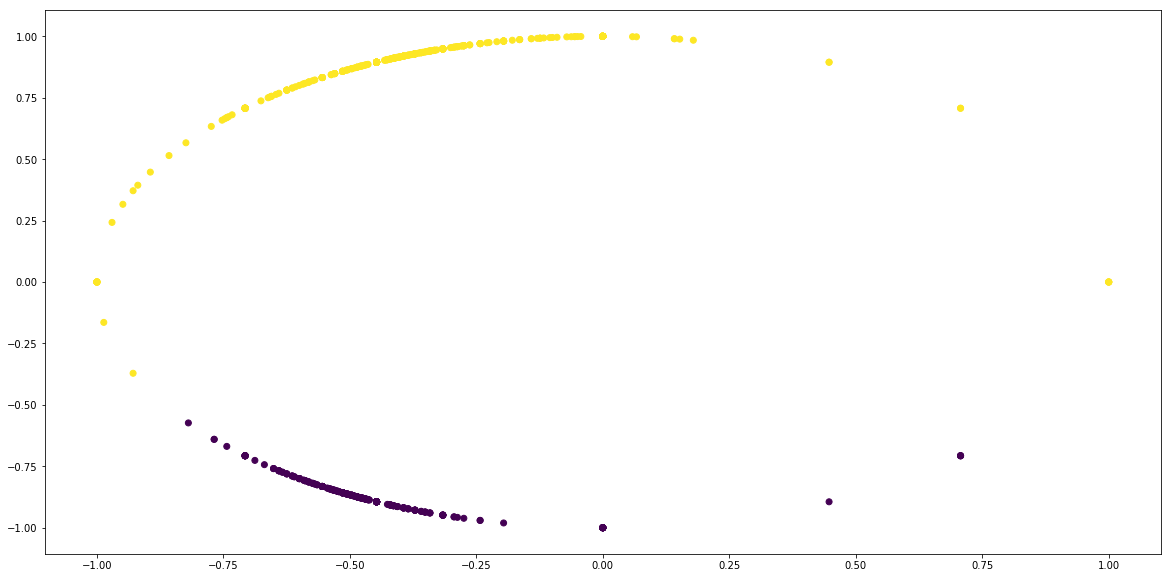

In [371]:
#plot the result with labels
plt.figure(figsize=(20,10))
plt.scatter(trainDataA[:,0],trainDataA[:,1],c=z)

# Mandatory question

In [373]:
"""
Load all the files's name
"""
X=[]
y=[]
for i in range(1,51):
    if i<10:
        x='0'+str(i)
    else:
        x=str(i)
    X.append('A'+x+'.txt')
    y.append('A')
    X.append('L'+x+'.txt')
    y.append('L')
X=np.array(X)
y=np.array(y)

In [374]:
fold=KFold(100,n_folds=5,shuffle=True)

In [375]:
accurracy_list=[]
for train_index, test_index in fold:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    trainDataA=np.array([])
    lengthsA=[]
    trainDataL=np.array([])
    lengthsL=[]
    intA=False
    intL=False
    for i in range(X_train.shape[0]):
        data=pd.read_csv('Unistroke/'+X_train[i],'\t')
        data=(data-data.shift(-1)).dropna()
        if(y_train[i]=='A'):
            if(intA):
                trainDataA=np.concatenate([trainDataA,data.values])
                lengthsA.append(len(data.values))
            else:
                trainDataA=data.values
                lengthsA.append(len(data.values))
                intA=True
        else:
            if(intL):
                trainDataL=np.concatenate([trainDataL,data.values])
                lengthsL.append(len(data.values))
            else:
                trainDataL=data.values
                lengthsL.append(len(data.values))
                intL=True
    modelA=hmm.GaussianHMM(2,algorithm='viterbi',n_iter=10,tol=0.001)
    modelL=hmm.GaussianHMM(2,algorithm='viterbi',n_iter=10,tol=0.001)
    modelA.fit(trainDataA,lengths=lengthsA)
    modelL.fit(trainDataL,lengths=lengthsL)
    n = 0
    for i in range(X_test.shape[0]):
        data=pd.read_csv('Unistroke/'+X_test[i],'\t')
        data=(data-data.shift(-1)).dropna()
        scoreA=modelA.score(data.values)
        scoreL=modelL.score(data.values)
        n += (scoreA>scoreL and y_test[i]=='A') or (scoreA<=scoreL and y_test[i]=='L')
    accurracy_list.append(n/y_test.shape[0])
accurracy_list=np.array(accurracy_list)
print(accurracy_list)
print(np.average(accurracy_list))

[1 1 1 1 1]
1.0


In [376]:
accurracy_list=[]
for train_index, test_index in fold:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    trainDataA=[]
    lengthsA=[]
    trainDataL=[]
    lengthsL=[]
    intA=False
    intL=False
    for i in range(X_train.shape[0]):
        data=pd.read_csv('Unistroke/'+X_train[i],'\t')
        data=(data-data.shift(-1)).dropna()
        angles=np.array(np.arctan2(data.iloc[:,1],data.iloc[:,0])).reshape((data.shape[0],1))
        if(y_train[i]=='A'):
            trainDataA.append(angles)
        else:
            trainDataL.append(angles)
    modelA=VonMisesHMM(n_states=2,n_iter=10,n_init=10,thresh=0.1,reversible_type='mle')
    modelL=VonMisesHMM(n_states=2,n_iter=10,n_init=10)
    modelA.fit(trainDataA)
    modelL.fit(trainDataL)
    n = 0
    for i in range(X_test.shape[0]):
        data=pd.read_csv('Unistroke/'+X_test[i],'\t')
        data=(data-data.shift(-1)).dropna()
        angles=np.array(np.arctan2(data.iloc[:,1],data.iloc[:,0])).reshape((data.shape[0],1,1))
        scoreA=modelA.score(angles)
        scoreL=modelL.score(angles)
        n += (scoreA>scoreL and y_test[i]=='A') or (scoreA<=scoreL and y_test[i]=='L')
    accurracy_list.append(n/y_test.shape[0])
accurracy_list=np.array(accurracy_list)
print(accurracy_list)
print(np.average(accurracy_list))

[1 1 1 1 1]
1.0


In [377]:
trainDataA=[]
for i in range(1,51):
    if i<10:
        x='0'+str(i)
    else:
        x=str(i)
    data=pd.read_csv('Unistroke/A'+x+'.txt','\t')[1:]
    data=(data-data.shift(1)).dropna()
    
    angles=np.array(np.arctan2(data.iloc[:,1],data.iloc[:,0])).reshape((data.shape[0],1))
    trainDataA.append(angles)
    #trainDataA.append(data.values)
modelA=VonMisesHMM(n_states=2,n_iter=100,n_init=1,thresh=0.01,reversible_type='mle')
modelA.fit(trainDataA)


In [378]:
z=modelA.predict(trainDataA)

In [379]:
labels=[]
angles=[]
for x in z[1]:
    labels.extend(x)
for x in trainDataA:
    angles.extend(x.reshape(x.shape[0]))
    
labels=np.array(labels)
angles=np.array(angles)

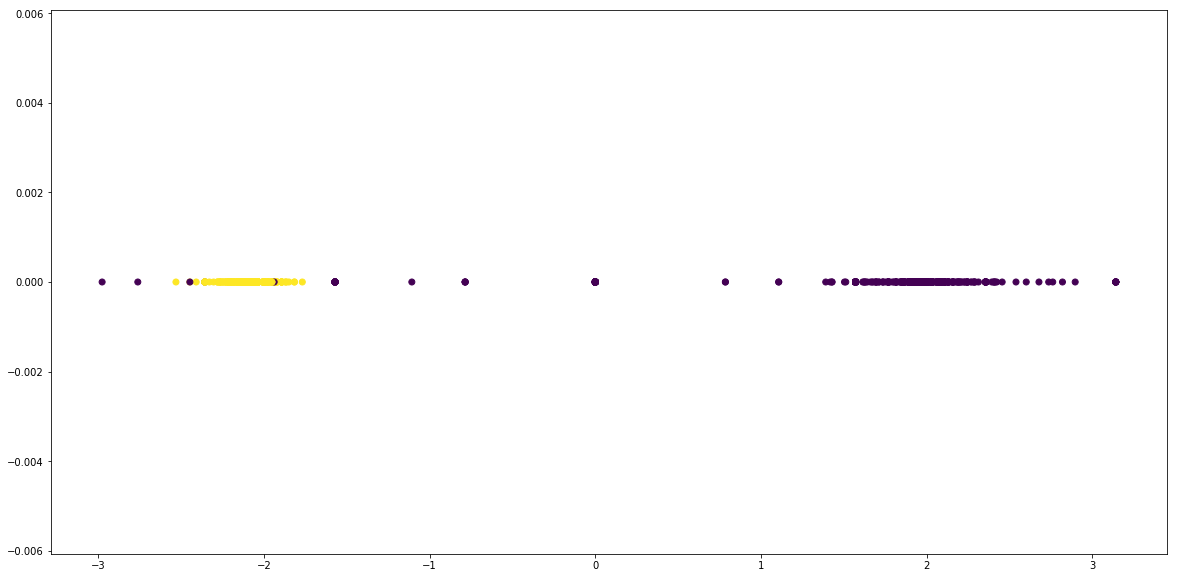

In [381]:
#plot the result with labels
plt.figure(figsize=(20,10))
plt.scatter(angles,np.zeros(angles.shape[0]),c=labels)

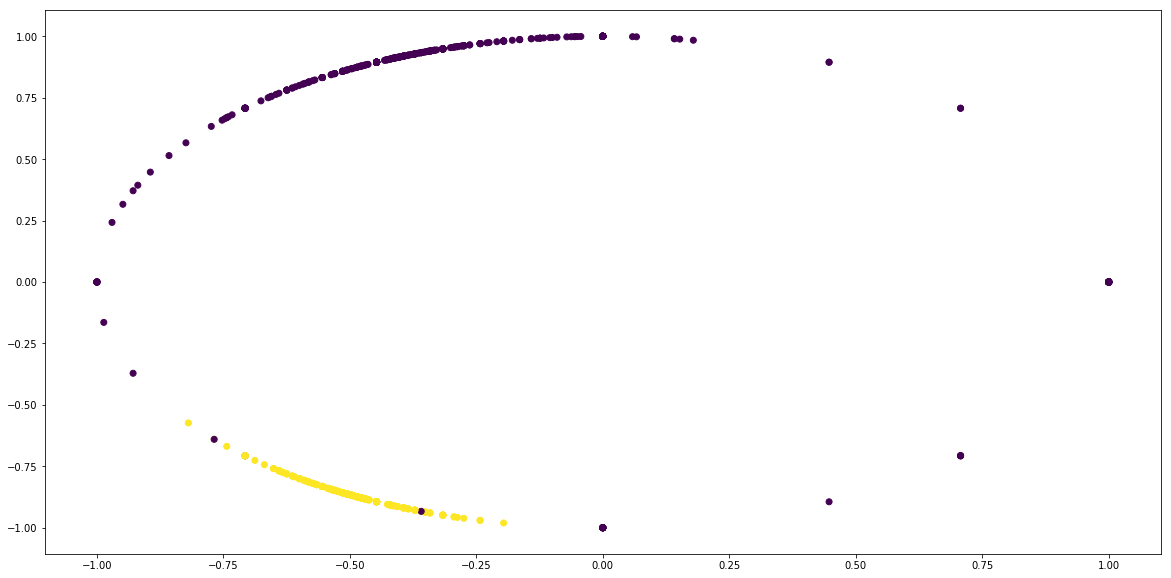

In [382]:
#plot the result with labels
plt.figure(figsize=(20,10))
plt.scatter(np.cos(angle),np.sin(angle),c=labels)

# Optional questions

In [385]:
"""
We build a model to generate samples of letter A with 2 states
"""

# Our model always start with state 1
startprob = np.array([1,0])

#Continue in state 1 for long length of the sequence
#then transmit to state 2 without possibility to return to state 1
transmat = np.array([[0.95,0.05],
                     [0,1]])

#In these data, the letter a is written from right to left
#For the state 1 we have a vector with angle -3*Pi/4 we can write these vectors as (-1,-1)
#and for the state 2 we have vector with angle 3*Pi/4 we can write these vectors as (-1,1)
means = np.array([[-1,-1],
                 [-1,1]])

#We chose small covariances because letter a is almost similar to two line with angle pi/4 between them,
#and we don't have a big variance between the direction of the vectors
cov1=np.array([[0.1,0],
               [0,0.1]])
cov2=np.array([[0.1,0],
               [0,0.1]])
covars =  np.array([cov1,cov2])

#Build an HMM instance with 2 states
model = hmm.GaussianHMM(n_components=2, covariance_type="full")

#Set the parameters

model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

In [386]:
"""
Generate 1000 sequences of length 30
"""
samples=[]
for i in range(1000):
    samples.append(model.sample(30))
samples=np.array(zip(*samples)[0])

In [387]:
fold=KFold(100,5,shuffle=True)

In [388]:
"""
Cross validated log likelihood estimator
"""
fold=KFold(100,5,shuffle=True)

scores_means=[]
for i in range(1,11):
    scores_list=[]
    for train_index, test_index in fold:
        X_train, X_test = samples[train_index], samples[test_index]
        trainDataA=np.array([])
        lengthsA=[]
        intA=False
        for data in samples:
            data=pd.DataFrame(data)
            data=(data-data.shift(-1)).dropna()
            if(intA):
                trainDataA=np.concatenate([trainDataA,data.values])
                lengthsA.append(len(data.values))
            else:
                trainDataA=data.values
                lengthsA.append(len(data.values))
                intA=True
        modelA=hmm.GaussianHMM(i,algorithm='viterbi',n_iter=10,tol=0.001)
        modelA.fit(trainDataA,lengths=lengthsA)
        n = 0
        scoreA=0
        for data in X_test:
            data=pd.DataFrame(data)
            data=(data-data.shift(-1)).dropna()
            if(data.values.shape[0]==0):
                continue
            scoreA += modelA.score(data.values)
        scores_list.append(scoreA)
    scores_list=np.array(scores_list)
    scores_means.append(np.average(scores_list))
scores_means

[-826.1552840313095,
 -788.7573769467983,
 -737.8878672396477,
 -720.0891600164466,
 -698.2142887096013,
 -686.4367336331428,
 -677.4299735502476,
 -673.8860376622035,
 -669.674049956908,
 -667.3464850870938]

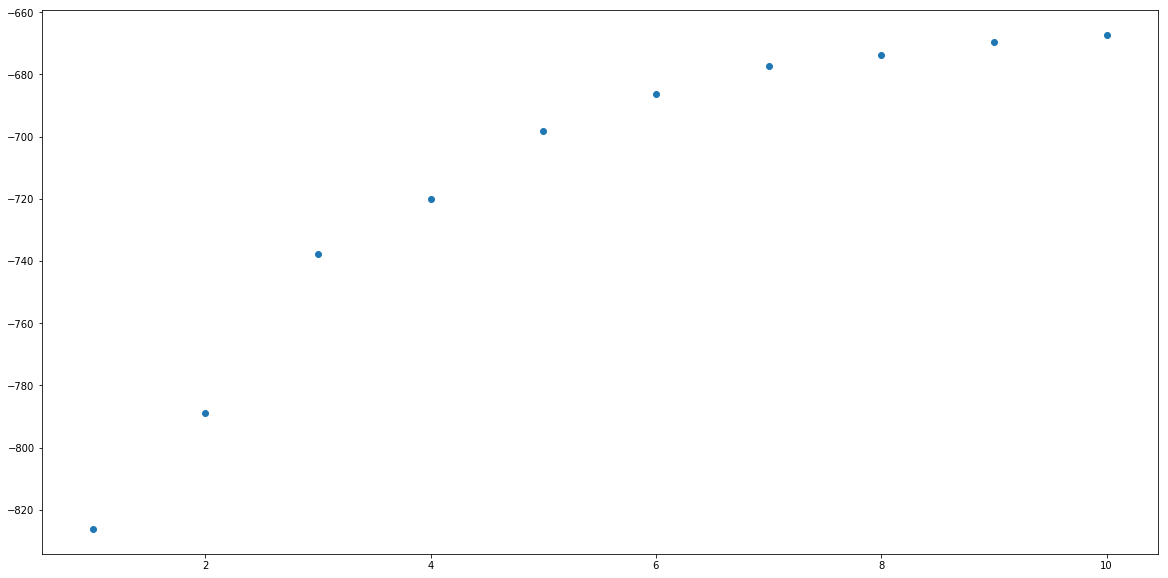

In [389]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,11),scores_means)

In [304]:
"""
BIC estimator
"""
scores_means=[]
for i in range(1,11):
    scores_list=[]
    X_train, X_test = samples[:800], samples[800:]
    trainDataA=np.array([])
    lengthsA=[]
    intA=False
    for data in samples:
        data=pd.DataFrame(data)
        data=(data-data.shift(-1)).dropna()
        if(intA):
            trainDataA=np.concatenate([trainDataA,data.values])
            lengthsA.append(len(data.values))
        else:
            trainDataA=data.values
            lengthsA.append(len(data.values))
            intA=True
    modelA=hmm.GaussianHMM(i,algorithm='viterbi',n_iter=10,tol=0.001)
    modelA.fit(trainDataA,lengths=lengthsA)
    n = 0
    scoreA=0
    for data in X_test:
        data=pd.DataFrame(data)
        data=(data-data.shift(-1)).dropna()
        if(data.values.shape[0]==0):
            continue
        scoreA += modelA.score(data.values)
    scores_list.append(scoreA)
    scores_list=np.array(scores_list)
    avg=np.average(scores_list)
    bic_score=(i**2+i)*np.log(1000)-2*(avg)
    print(bic_score)
    scores_means.append(bic_score)
scores_means

16448.881204829748
16041.959206924334
16282.61188871984
17086.018522655126
19321.43300099118
23817.51128500118
31245.566352415328
42815.47333166752
59743.18517108268
83457.28082509234


[16448.881204829748,
 16041.959206924334,
 16282.61188871984,
 17086.018522655126,
 19321.43300099118,
 23817.51128500118,
 31245.566352415328,
 42815.47333166752,
 59743.18517108268,
 83457.28082509234]

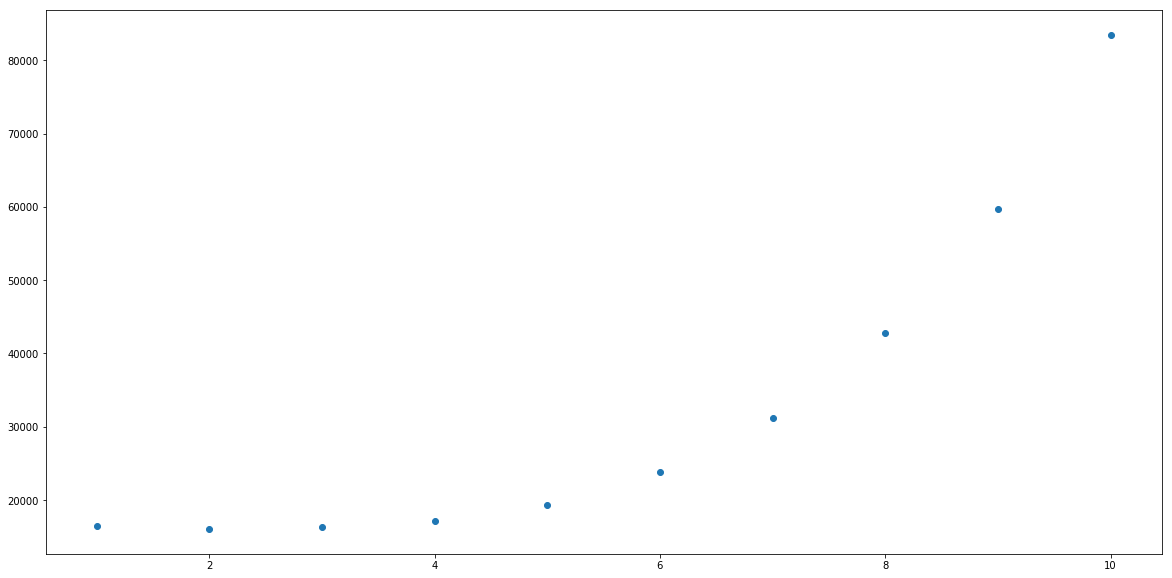

In [305]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,11),scores_means)

In [391]:
"""
Model to generate samples of square from 4 states
"""

# Our model always start with state 1
startprob = np.array([1,0,0,0])

#Continue in state 1 for long length of the sequence
#then transmit to state 2 without possibility to return to state 1
transmat = np.array([[0.95,0.05,0,0],
                     [0,0.95,0.05,0],
                     [0,0,0.95,0.05],
                     [0,0,0,1]])

#In these data, the letter a is written from right to left
#For the state 1 we have a vector with angle -3*Pi/4 we can write these vectors as (-1,-1)
#and for the state 2 we have vector with angle 3*Pi/4 we can write these vectors as (-1,1)
means = np.array([[1,0],
                  [0,-1],
                  [-1,0],
                  [0,1]])

#We chose small covariances because letter a is almost similar to two line with angle pi/4 between them,
#and we don't have a big variance between the direction of the vectors
cov1=np.array([[0.1,0],
               [0,0.1]])
cov2=np.array([[0.1,0],
               [0,0.1]])
cov3=np.array([[0.1,0],
               [0,0.1]])
cov4=np.array([[0.1,0],
               [0,0.1]])
covars =  np.array([cov1,cov2,cov3,cov4])

#Build an HMM instance with 2 states
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

#Set the parameters

model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

In [392]:
"""
Generate 1000 sequences of length 30
"""
samples=[]
for i in range(1000):
    samples.append(model.sample(30))
samples=np.array(zip(*samples)[0])

In [393]:
"""
BIC estimator
"""
scores_means=[]
for i in range(1,11):
    scores_list=[]
    X_train, X_test = samples[:800], samples[800:]
    trainDataA=np.array([])
    lengthsA=[]
    intA=False
    for data in samples:
        data=pd.DataFrame(data)
        data=(data-data.shift(-1)).dropna()
        if(intA):
            trainDataA=np.concatenate([trainDataA,data.values])
            lengthsA.append(len(data.values))
        else:
            trainDataA=data.values
            lengthsA.append(len(data.values))
            intA=True
    modelA=hmm.GaussianHMM(i,algorithm='viterbi',n_iter=10,tol=0.001)
    modelA.fit(trainDataA,lengths=lengthsA)
    n = 0
    scoreA=0
    for data in X_test:
        data=pd.DataFrame(data)
        data=(data-data.shift(-1)).dropna()
        if(data.values.shape[0]==0):
            continue
        scoreA += modelA.score(data.values)
    scores_list.append(scoreA)
    scores_list=np.array(scores_list)
    avg=np.average(scores_list)
    bic_score=(i**2+i)*np.log(1000)-2*(avg)
    print(bic_score)
    scores_means.append(bic_score)
scores_means

16827.7896120384
16361.276923617897
16671.148834068335
17444.572548166314
19658.990085047335
24170.311395156008
31640.73950515164
43192.26044884788
60182.82229750996
83865.43642360512


[16827.7896120384,
 16361.276923617897,
 16671.148834068335,
 17444.572548166314,
 19658.990085047335,
 24170.311395156008,
 31640.73950515164,
 43192.26044884788,
 60182.82229750996,
 83865.43642360512]

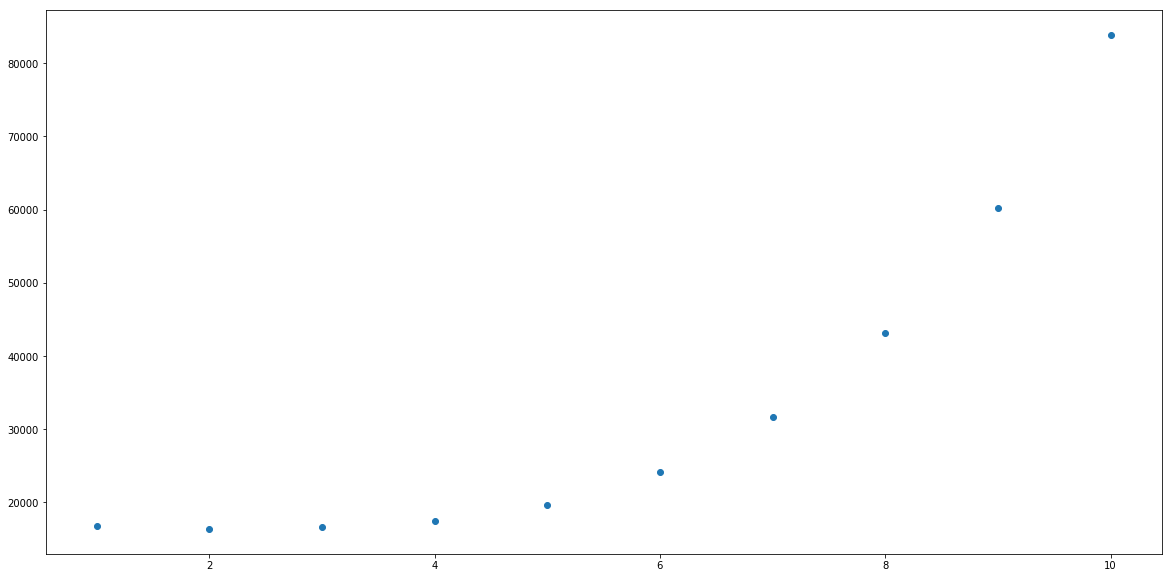

In [394]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,11),scores_means)

## Now we will use the estimator to estimate the number of needed state for each letter

In [437]:
"""
BIC estimator
"""
def estimator(dataList):
    min_i=0
    min_score=1
    scores_means=[]
    for i in range(1,11):
        scores_list=[]
        X_train, X_test = dataList[:40], dataList[40:]
        trainDataA=np.array([])
        lengthsA=[]
        intA=False
        for data in dataList:
            data=(data-data.shift(-1)).dropna()
            if(intA):
                trainDataA=np.concatenate([trainDataA,data.values])
                lengthsA.append(len(data.values))
            else:
                trainDataA=data.values
                lengthsA.append(len(data.values))
                intA=True
        modelA=hmm.GaussianHMM(i,algorithm='viterbi',n_iter=10,tol=0.001)
        modelA.fit(trainDataA,lengths=lengthsA)
        n = 0
        scoreA=0
        for data in X_test:
            data=(data-data.shift(-1)).dropna()
            if(data.values.shape[0]==0):
                continue
            scoreA += modelA.score(data.values)
        scores_list.append(scoreA)
        scores_list=np.array(scores_list)
        avg=np.average(scores_list)
        bic_score=(i**2+i)*np.log(50)-2*(avg)
        scores_means.append(bic_score)
        if min_score==1:
            min_score=bic_score
            min_i=i
        else:
            if min_score>bic_score:
                min_score=bic_score
                min_i=i
    return scores_means,min_i

In [402]:
"""
Load all the data
"""
A=[]
E=[]
H=[]
L=[]
O=[]
Q=[]
for i in range(1,51):
    if i<10:
        x='0'+str(i)
    else:
        x=str(i)
        
    A.append(pd.read_csv('Unistroke/A'+x+'.txt','\t'))
    E.append(pd.read_csv('Unistroke/E'+x+'.txt','\t'))
    H.append(pd.read_csv('Unistroke/H'+x+'.txt','\t'))
    L.append(pd.read_csv('Unistroke/L'+x+'.txt','\t'))
    O.append(pd.read_csv('Unistroke/O'+x+'.txt','\t'))
    Q.append(pd.read_csv('Unistroke/Q'+x+'.txt','\t'))

In [438]:
scores_A,minA=estimator(A)
scores_E,minE=estimator(E)
scores_H,minH=estimator(H)
scores_L,minL=estimator(L)
scores_O,minO=estimator(O)
scores_Q,minQ=estimator(Q)

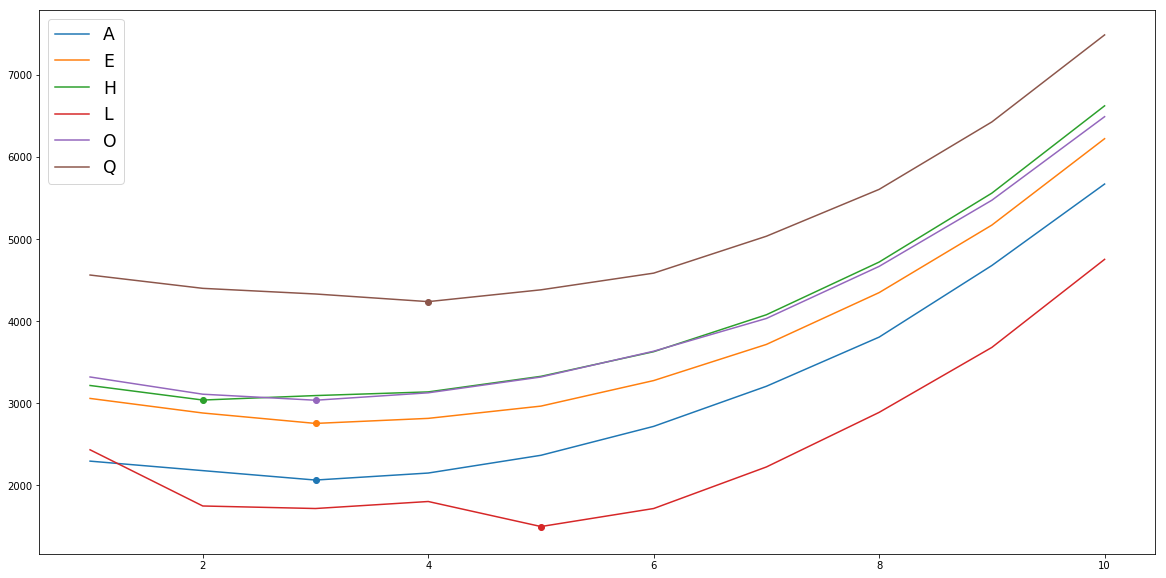

In [456]:
plt.figure(figsize=(20,10))
plt.plot(range(1,11),scores_A)
plt.scatter(minA,scores_A[minA-1])
plt.plot(range(1,11),scores_E)
plt.scatter(minE,scores_E[minE-1])
plt.plot(range(1,11),scores_H)
plt.scatter(minH,scores_H[minH-1])
plt.plot(range(1,11),scores_L)
plt.scatter(minL,scores_L[minL-1])
plt.plot(range(1,11),scores_O)
plt.scatter(minO,scores_O[minO-1])
plt.plot(range(1,11),scores_Q)
plt.scatter(minQ,scores_Q[minQ-1])
plt.legend(['A','E','H','L','O','Q'],fontsize = 'xx-large')
#plt.legend()

In [5]:
"""
Load all the files's name
"""
X=[]
y=[]
for i in range(1,51):
    if i<10:
        x='0'+str(i)
    else:
        x=str(i)
    X.append('A'+x+'.txt')
    y.append('A')
    X.append('E'+x+'.txt')
    y.append('E')
    X.append('H'+x+'.txt')
    y.append('H')
    X.append('L'+x+'.txt')
    y.append('L')
    X.append('O'+x+'.txt')
    y.append('O')
    X.append('Q'+x+'.txt')
    y.append('Q')
X=np.array(X)
y=np.array(y)

In [6]:
len(X)

300

In [7]:
fold=KFold(300,5,shuffle=True)

In [8]:
accurracy_list=[]
average_matrix=None
initMatrix=False
covA=None
covE=None
covH=None
covL=None
covO=None
covQ=None
meanA=None
meanE=None
meanH=None
meanL=None
meanO=None
meanQ=None
for train_index, test_index in fold:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    trainDataA=np.array([])
    lengthsA=[]
    trainDataE=np.array([])
    lengthsE=[]
    trainDataH=np.array([])
    lengthsH=[]
    trainDataL=np.array([])
    lengthsL=[]
    trainDataO=np.array([])
    lengthsO=[]
    trainDataQ=np.array([])
    lengthsQ=[]
    intA=False
    intE=False
    intH=False
    intL=False
    intO=False
    intQ=False
    for i in range(X_train.shape[0]):
        data=pd.read_csv('Unistroke/'+X_train[i],'\t')
        data=(data-data.shift(-1)).dropna()
        if(y_train[i]=='A'):
            if(intA):
                trainDataA=np.concatenate([trainDataA,data.values])
                lengthsA.append(len(data.values))
            else:
                trainDataA=data.values
                lengthsA.append(len(data.values))
                intA=True
        elif(y_train[i]=='E'):
            if(intE):
                trainDataE=np.concatenate([trainDataE,data.values])
                lengthsE.append(len(data.values))
            else:
                trainDataE=data.values
                lengthsE.append(len(data.values))
                intE=True
        elif(y_train[i]=='H'):
            if(intH):
                trainDataH=np.concatenate([trainDataH,data.values])
                lengthsH.append(len(data.values))
            else:
                trainDataH=data.values
                lengthsH.append(len(data.values))
                intH=True
        elif(y_train[i]=='L'):
            if(intL):
                trainDataL=np.concatenate([trainDataL,data.values])
                lengthsL.append(len(data.values))
            else:
                trainDataL=data.values
                lengthsL.append(len(data.values))
                intL=True
        elif(y_train[i]=='O'):
            if(intO):
                trainDataO=np.concatenate([trainDataO,data.values])
                lengthsO.append(len(data.values))
            else:
                trainDataO=data.values
                lengthsO.append(len(data.values))
                intO=True
        elif(y_train[i]=='Q'):
            if(intQ):
                trainDataQ=np.concatenate([trainDataQ,data.values])
                lengthsQ.append(len(data.values))
            else:
                trainDataQ=data.values
                lengthsQ.append(len(data.values))
                intQ=True
    modelA=hmm.GaussianHMM(3,algorithm='viterbi',n_iter=10,tol=0.001)
    modelE=hmm.GaussianHMM(3,algorithm='viterbi',n_iter=10,tol=0.001)
    modelH=hmm.GaussianHMM(2,algorithm='viterbi',n_iter=10,tol=0.001)
    modelL=hmm.GaussianHMM(5,algorithm='viterbi',n_iter=10,tol=0.001)
    modelO=hmm.GaussianHMM(3,algorithm='viterbi',n_iter=10,tol=0.001)
    modelQ=hmm.GaussianHMM(4,algorithm='viterbi',n_iter=10,tol=0.001)
    modelA.fit(trainDataA,lengths=lengthsA)
    modelE.fit(trainDataE,lengths=lengthsE)
    modelH.fit(trainDataH,lengths=lengthsH)
    modelL.fit(trainDataL,lengths=lengthsL)
    modelO.fit(trainDataO,lengths=lengthsO)
    modelQ.fit(trainDataQ,lengths=lengthsQ)
    n = 0
    y_predict=[]
    for i in range(X_test.shape[0]):
        data=pd.read_csv('Unistroke/'+X_test[i],'\t')
        data=(data-data.shift(-1)).dropna()
        scoreA=modelA.score(data.values)
        scoreE=modelE.score(data.values)
        scoreH=modelH.score(data.values)
        scoreL=modelL.score(data.values)
        scoreO=modelO.score(data.values)
        scoreQ=modelQ.score(data.values)
        m=max([scoreA,scoreE,scoreH,scoreL,scoreO,scoreQ])
        n += (scoreA==m and y_test[i]=='A') or (scoreE==m and y_test[i]=='E') or (scoreH==m and y_test[i]=='H') or (scoreL==m and y_test[i]=='L') or (scoreO==m and y_test[i]=='O') or (scoreQ==m and y_test[i]=='Q')
        if(scoreA==m):
            y_predict.append('A')
        elif(scoreE==m):
            y_predict.append('E')
        elif(scoreH==m):
            y_predict.append('H')
        elif(scoreL==m):
            y_predict.append('L')
        elif(scoreO==m):
            y_predict.append('O')
        elif(scoreQ==m):
            y_predict.append('Q')
    matrix=confusion_matrix(y_true=y_test,y_pred=y_predict)
    if(not initMatrix):
        average_matrix=matrix.astype(float)/5
        covA=modelA.covars_/5
        covE=modelE.covars_/5
        covH=modelH.covars_/5
        covL=modelL.covars_/5
        covO=modelO.covars_/5
        covQ=modelQ.covars_/5
        meanA=modelA.means_/5
        meanE=modelE.means_/5
        meanH=modelH.means_/5
        meanL=modelL.means_/5
        meanO=modelO.means_/5
        meanQ=modelQ.means_/5
        initMatrix=True
        
    else:
        average_matrix=np.add(average_matrix,matrix.astype(float)/5)
        covA+=modelA.covars_/5
        covE+=modelE.covars_/5
        covH+=modelH.covars_/5
        covL+=modelL.covars_/5
        covO+=modelO.covars_/5
        covQ+=modelQ.covars_/5
        meanA+=modelA.means_/5
        meanE+=modelE.means_/5
        meanH+=modelH.means_/5
        meanL+=modelL.means_/5
        meanO+=modelO.means_/5
        meanQ+=modelQ.means_/5
    accurracy_list.append(float(n)/y_test.shape[0])
accurracy_list=np.array(accurracy_list)
print(accurracy_list)
print(np.average(accurracy_list))
print(average_matrix)

[1.         1.         1.         0.98333333 1.        ]
0.9966666666666667
[[ 9.8  0.   0.2  0.   0.   0. ]
 [ 0.  10.   0.   0.   0.   0. ]
 [ 0.   0.  10.   0.   0.   0. ]
 [ 0.   0.   0.  10.   0.   0. ]
 [ 0.   0.   0.   0.  10.   0. ]
 [ 0.   0.   0.   0.   0.  10. ]]


In [511]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

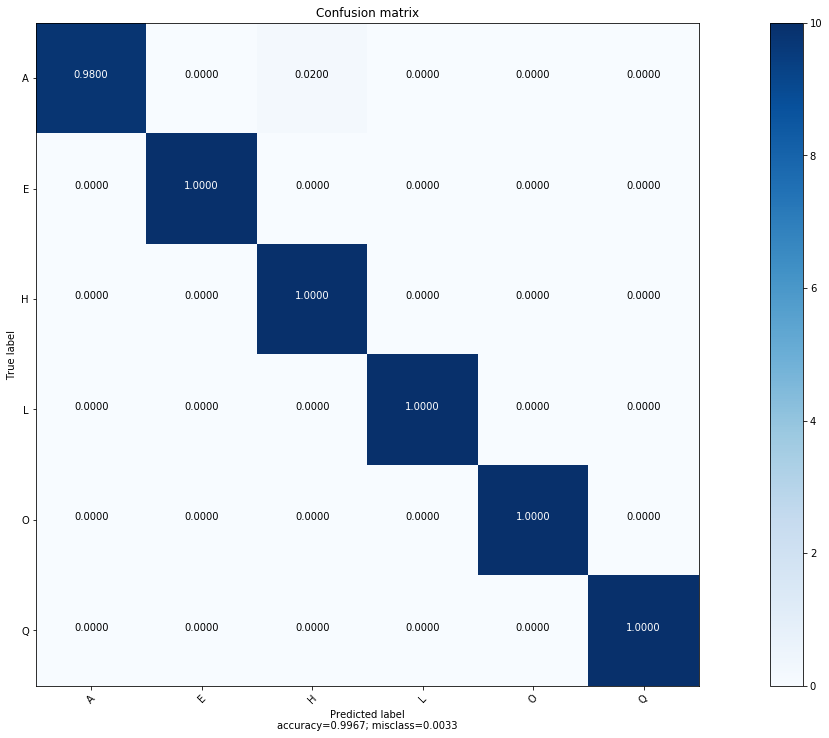

In [512]:
plot_confusion_matrix(average_matrix,['A','E','H','L','O','Q'])

In [9]:
covA

array([[[ 8.59249461,  0.        ],
        [ 0.        , 26.53059006]],

       [[ 8.27496698,  0.        ],
        [ 0.        , 24.46697176]],

       [[ 4.73645494,  0.        ],
        [ 0.        , 16.02482168]]])

In [10]:
meanA

array([[ 5.20028617,  0.0399591 ],
       [ 5.21414896,  0.09487922],
       [ 2.87466511, -0.06329199]])

In [11]:
covE

array([[[23.2524531 ,  0.        ],
        [ 0.        ,  7.46130233]],

       [[29.26265435,  0.        ],
        [ 0.        , 10.29343534]],

       [[33.43310311,  0.        ],
        [ 0.        , 12.0089503 ]]])

In [12]:
meanE

array([[ 6.18823224, -0.70935444],
       [-4.7577105 , -4.33438416],
       [ 0.87985666, -3.4831973 ]])

In [19]:
covH

array([[[ 8.7799085 ,  0.        ],
        [ 0.        , 28.55783121]],

       [[ 6.81143923,  0.        ],
        [ 0.        , 26.53152426]]])

In [20]:
meanH

array([[ 2.27603485, -0.50683744],
       [ 1.56351884, -2.08144259]])

In [21]:
covL

array([[[ 6.77233333,  0.        ],
        [ 0.        ,  4.94073849]],

       [[ 1.16916127,  0.        ],
        [ 0.        ,  4.61666575]],

       [[ 1.39634453,  0.        ],
        [ 0.        ,  4.7730378 ]],

       [[11.4480246 ,  0.        ],
        [ 0.        ,  0.65336663]],

       [[ 5.23079057,  0.        ],
        [ 0.        ,  3.60451042]]])

In [14]:
meanL

array([[ 2.46361954, -4.10584735],
       [ 0.53304719, -3.97802405],
       [ 0.69920266, -3.78724849],
       [ 7.51194937, -0.60265259],
       [ 1.45183959, -2.74498399]])

In [15]:
covO

array([[[15.13124823,  0.        ],
        [ 0.        , 17.27839563]],

       [[19.39645303,  0.        ],
        [ 0.        , 14.98918955]],

       [[13.31556184,  0.        ],
        [ 0.        , 19.24125857]]])

In [16]:
meanO

array([[-0.89188002,  2.2237268 ],
       [ 0.62348211, -2.29838902],
       [ 3.33595281,  1.18338618]])

In [17]:
covQ

array([[[22.02721275,  0.        ],
        [ 0.        , 21.71259948]],

       [[23.58911293,  0.        ],
        [ 0.        , 17.12324371]],

       [[28.05105579,  0.        ],
        [ 0.        , 15.44195325]],

       [[23.43386459,  0.        ],
        [ 0.        , 17.38335119]]])

In [18]:
meanQ

array([[ 0.03607371,  1.52498257],
       [ 2.52811677,  0.2978714 ],
       [-1.79319986, -1.92662995],
       [ 2.43415912,  0.18880749]])